# Assignment 3.1
Name:  Victor Hugo Germano
Date: 09/14/2024

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import scipy.stats as stats

np.set_printoptions(precision=2)

<Token var=<ContextVar name='format_options' default={'edgeitems': 3, 'threshold': 1000, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': 9223372036854775807, 'override_repr': None} at 0x10c10cea0> at 0x10f9f5e00>

## Problem 3.2.

In an exit poll of 1648 voters in the 2020 Senatorial election in Arizona, 51.5% said they voted
for Mark Kelly and 48.5% said they voted for Martha McSally

a) Suppose that actually 50% of the population voted for Kelly. If this exit poll had the
properties of a simple random sample, find the standard error of the sample proportion
voting for him.

b) Under the 50% presumption, are the results of the exit poll surprising? Why? Would you
be willing to predict the election outcome? Explain by (i) conducting a simulation; (ii)
using the value found in (a) for the standard error.

`(a) Your answer goes here`

In [8]:
sample_size=1648
mean = proportion = 0.5 #the mean of the sampling distribution of the sample proportion: muˆp = p

# applying the SE formula for the sampling 
std_error = proportion / np.sqrt(sample_size)

print("Standard Error: %.4f"%std_error)

Standard Error: 0.0123


`(b) Your answer goes here`

The results are not surprising, because they fall within the expected results giving the previous pool, and based on the simulations below, nearly all votes fall between about 49% and 50% based on the Santard Error of 1.2%.


In [9]:
# Define sample bounderies for simulation
print(f"Std error: {std_error:.4f}")
bounderies = (mean - 3*std_error, mean + 3*std_error)
print("Value bounderies based on std_error: (%.4f, %.4f)"%bounderies)
print()

#simulations
# simulating 10000 flips
simulations = 10000
results = np.random.binomial(sample_size, proportion, simulations)

simu_proportions = results / sample_size #list of proportions based on the base sample

simu_mean = np.mean(simu_proportions)
simu_std = np.std(simu_proportions)
simu_std_error = simu_std / np.sqrt(sample_size)

simu_bounderies = (simu_mean - 3*simu_std_error, simu_mean + 3*simu_std_error)

print(f"Proportion of a million samples: {simu_mean:.4f}")
print(f"Std of a million samples: {simu_std:.4f}")
print(f"Std error of a million samples: {simu_std_error:.4f}")
print("Confidence level: (%.5f, %.5f) "%simu_bounderies) 


Std error: 0.0123
Value bounderies based on std_error: (0.4631, 0.5369)

Proportion of a million samples: 0.5000
Std of a million samples: 0.0123
Std error of a million samples: 0.0003
Confidence level: (0.49905, 0.50087) 


## Problem 3.3.

 The 49 students in a class at the University of Florida made blinded evaluations of pairs of
cola drinks. For the 49 comparisons of Coke and Pepsi, Coke was preferred 29 times. In the
population that this sample represents, is this strong evidence that a majority prefers Coke?
Use a simulation of a sampling distribution to answer.

`Your answer goes here`

There's a strong evidence that the majority prefer coke, given that the result is right sided after 100k simulations 

Stated proportion: 0.5918
Mean of a million samples: 24.48803
Std of a million samples: 3.491537873072552


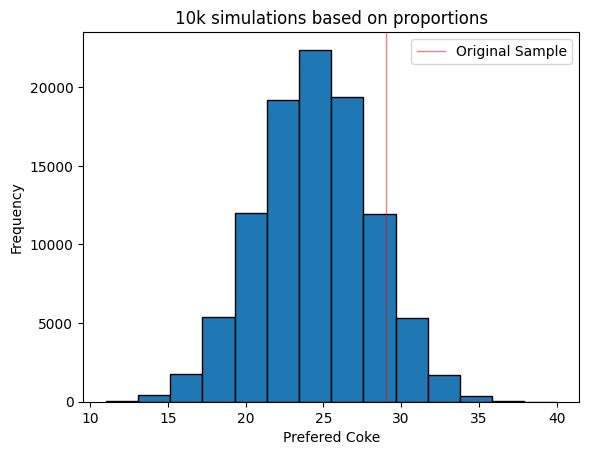

In [10]:
sample_size = 49 #n
prefered_coke = 29
proportion = prefered_coke / sample_size #pi

print(f"Stated proportion: {proportion:.4f}")

#Assuming a simulation of 10000 samplings
results = np.random.binomial(sample_size, 0.5, 100000)
print(f"Mean of a million samples: {np.mean(results)}")
print(f"Std of a million samples: {np.std(results)}")


plt.hist(results, bins=14, edgecolor='k')
plt.axvline(prefered_coke, color='red', label="Original Sample", linewidth=1, alpha=0.5)
            
plt.title("10k simulations based on proportions")
plt.ylabel("Frequency")
plt.xlabel("Prefered Coke")
plt.legend()
plt.show()

## Problem 3.5.

The example in Section 3.1.4 simulated sampling distributions of the sample mean to determine how precise $\bar{Y}$ for $n=25$ may estimate a population mean $\mu.$

a) Find the theoretical standard error of $\bar{Y}$ for the scenario values of $\sigma = 5$ and 8. How do they compare to the standard deviations of the 100,000 sample means in the simulations?

`Your answer goes here`

The following demonstration will find the SE for both the scenarios, and comparing with the simulations from the book, we can see the most of the results will fall close to the SE calculated here.

As an example, I also runned a sampling distribution based on the data from the book, arriving at similar numbers

In [11]:
sample_size = 25 #n

# Run simulations and find STD for 100k simulations
def find_se_std(mean, shape, scale, sample_size):
    std_error = mean / np.sqrt(sample_size)
    gamma = np.random.gamma(shape, scale, 100000)   
    std = np.std(gamma)
    mean = np.mean(gamma)
    print("Standard Error: %.2f"%std_error)
    print("STD and Mean for Scenario: %.3f, %.3f"%(std, mean))

#a) Find se for cenarios sigma=5
print("==== Scenario Mean 5 ====")
mean, shape, scale  = 5, 16, 1.25 # from book
find_se_std(mean, shape, scale, sample_size)

print()
print("==== Scenario Mean 8 ====")
mean, shape, scale  = 8, 9, 8/3 # from book
find_se_std(mean, shape, scale, sample_size)



==== Scenario Mean 5 ====
Standard Error: 1.00
STD and Mean for Scenario: 4.981, 19.990

==== Scenario Mean 8 ====
Standard Error: 1.60
STD and Mean for Scenario: 8.010, 24.055


b) In the first scenario, we chose $\sigma = 5$ under the belief that if $\mu = 20$, about 2/3 of the sample values would fall between `$`15 and `$`25. For the gamma distribution with $(\mu, \sigma) = (20,5),$ show that the actual probability between 15 and 25 is 0.688.

`Your answer goes here`

### Answer

We need to calculate the propability of a sample falls between 15 and 25, for mu=20 and sigma=5.

Finding the shape k
- $k = mu^2 / sigma^2 = 16$

- $theta = sigma^2 / mu^2 = 1.25$


$P(15 < X < 25)$?

$P(15 < X < 25) = P(X < 25) - P(X < 15)$

Using code to find the information



In [12]:
# Defining the gamma distribution
scale = 1.25
shape = 16
mu = 20

x = 15
g = stats.gamma.cdf(x, a=shape, scale=scale)


y = 25
c = stats.gamma.cdf(y, a=shape, scale=scale)

print("Probability of 15 < X < 25: %.3f"%(c - g))


Probability of 15 < X < 25: 0.688


## Problem 3.8.

Construct the sampling distribution of the sample proportion of heads, for flipping a balanced
coin (a) once; (b) twice; (c) three times; (d) four times. Describe how the shape changes
as the number of flips $n$ increases. What would happen if $n$ kept growing? Why?


`Your answer goes here`

The shape of the curve will change, tending closer to the mu as n increases, this is called _lar of large numbers_

In [2]:
# Sample Mean converges to the population mean on large numbers
def print_coin_flip(times=1):
    flip = np.random.choice([0,1], times)
    print("Distribution Mean for %.0f flips: %.9f"%(times, np.mean(flip)))


print_coin_flip() # 1 flip

print_coin_flip(2) # 2 flips

print_coin_flip(3) # 3 flips

print_coin_flip(4) # 4 flips

print_coin_flip(10000) # 10k flips

Distribution Mean for 1 flips: 1.000000000
Distribution Mean for 2 flips: 0.500000000
Distribution Mean for 3 flips: 1.000000000
Distribution Mean for 4 flips: 0.250000000
Distribution Mean for 10000 flips: 0.505500000


## Problem 3.13.

Simulate random sampling from a uniform population distribution with several $n$ values to
illustrate the Central Limit Theorem.

`Your answer goes here`

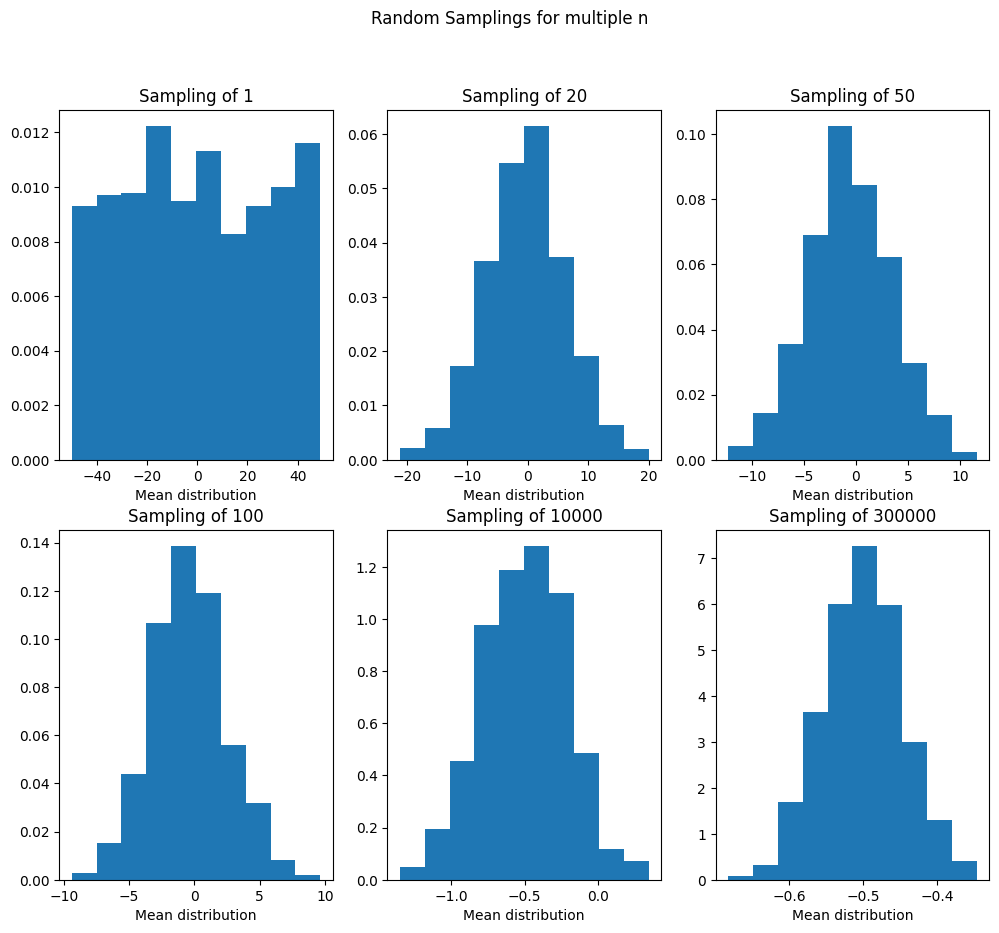

In [56]:

# CLT: the mean callculated from samples taken randomly 
#      from any distributions will be normally distributed

# number of samples
num = [1, 20, 50, 100, 10000, 300000]  
# list of sample means
means = []  

# Generating a list of random means  lists with numbers from -50 and 50
for j in num:
    x = [np.mean(np.random.randint(-50, 50, j)) for _i in range(1000)]
    means.append(x)
    
k = 0

fig, ax = plt.subplots(2, 3, figsize =(12, 10))

for i in range(0, 2):
    for j in range(0, 3):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_xlabel("Mean distribution")
        ax[i, j].set_title(label = f"Sampling of {num[k]}")
        k = k + 1

fig.suptitle("Random Samplings for multiple n")

plt.show()




## Problem 3.14.

On each bet in a sequence of bets, you win 1 dollar with probability 0.50 and lose 1 dollar (i.e., win negative 1 dollar) with probability 0.50. Let $Y$ denote the total of your winnings and losings after 100 bets. Giving your reasoning, state the approximate distribution of $Y.$ 

`Your answer goes here`

Y follows a binomial distribution with 0.5 probability.
Approximate total winnings on the simulation  -$6.00

As we increase the number of bets, the tendency is to equalize the net profit to zero, given the proportion

In [55]:
space =  [-1, 1]

bets = np.random.choice(space, 100)
wins = len(bets[bets == 1])
loses = len(bets[bets == -1])

print("Money won: $%.2f"%wins) 
print("Money lost: $%.2f"%loses) 
print("Net profit $%.2f"%(wins  - loses))


Money won: $47.00
Money lost: $53.00
Net profit $-6.00


## Problem 3.15.

According to a General Social Survey, in the United States the population distribution of $Y$ =
number of good friends (not including family members) has a mean of about 5.5 and a standard
deviation of about 3.9.

a) Is it plausible that this population distribution is normal? Explain.

`Your answer here`

Looking at first glance is possible to say its not plausible, given that at the center with 5.5 friends, no one have negative friends as you walk on the distribution following the 68-95-99.7 rule, where $Mean - 3*std$ could be a valid answer.

But, because we don't have more information about the data, we might not be able to determine the shape of the distribution where this information would come from, but we can assume the sample mean tends to be aproximetly normal regardless of the population distribution.

So it is possible that the population is normally distributed

b) If a new survey takes a simple random sample of 1000 people, describe the sampling
distribution of $\bar{Y}$ by giving its shape and approximate mean and standard error.

`Your answer here`

For a simple random sample of 1000 people, the sampling distribution of Y (sample mean) is expected to follow the Central Limit Theorem, and be normally distributed.

The standard error, can be calculated as the population standard deviation divided by the square root of the sample size. 
So, the standard error is 3.9 / sqrt(1000) = 0.123. 

The shape of the sampling distribution will be similar to a normal distribution. 
The mean of the sampling distribution is expected to be approximately 5.5, the population mean. 


c) Suppose that actually the mean of 5.5 and standard deviation of 3.9 are not population
values but are based on a sample of 1000 people. Treating results as a simple random
sample, give an interval of values within which you can be very sure that the population
mean falls. Explain your reasoning.

`Your answer here`

If the mean of 5.5 and standard deviation of 3.9 are based on a sample of 1000 people, we can construct a 95% confidence interval for the population mean. 

The formula for a 95% confidence interval is $sample mean ± (1.96 * standard error)$. 

The standard error, as calculated before, is 0.123. 

So, the 95% confidence interval is $5.5 ± (1.96 * 0.123) = 5.5 ± 0.241$.


## Problem 3.18.

Sunshine City, which attracts primarily retired people, has 90,000 residents with a mean age
of 72 years and a standard deviation of 12 years. The age distribution is skewed to the left. A
random sample of 100 residents of Sunshine City has $\bar{y} = 70$ and $s = 11.$

a)  Describe the center and spread of the (i) population distribution, (ii) sample data distribution. What shape does the sample data distribution probably have? Why?

`Your answer here`


For the population:
- The center of the population distribution is the mean of the population, which is 72
- The spread of the distribution is the standard deviation, which is 12


For the sample data:
- The center of the sample distribution is the mean, which 70
- The spread of the sample distribution is the standard deviation, which is 11
- Althought the population distribution is skewed to the left, we cannot say for certain the same about the sample, and can assume that a random sample from the population will have a tendency to be normally distributed, given the Central Limit Theorem



b) Find the center and spread of the sampling distribution of $\bar{Y}$ for $n = 100.$ What shape does it have and what does it describe?


`Your answer here`

### Answer

#### For a sampling population of 100:

- The center of the sampling distribution is the population mean: 72 years

<center>
    $E(\bar{Y}) = \mu = 72$ 
</center>

- The spread of the distributed is represented by the Standard Deviation of the Sample, or the Standard Error, based on the population $n=100$ and $\sigma=72$

<center>
    $SE(\bar{Y}) = \frac{12}{\sqrt{100}} = 1.2 years$
</center>

#### The Shape of the distribution:

This sample distribution have a tendency to have a bell shaped curve, given the Central Limit Theorem, and describe a subset of the population and will be normally distributed





c)  Explain why it would not be unusual to sample a person of age 60 in Sunshine City, but
it would be highly unusual for the sample mean to be 60, for a random sample of 100
residents.

`Your answer here`


Given the initial information, a sample containing a person of age 60 would be definetly possible, once the stard deviation of 12 years does contain the 60 year olds, as the possibility of randomly pooling an individual is the same, this occurrance is with the expected results.

On contrary, expecting to see a random sampling of 100 individuals with a sample mean of 60 is highly unusual, given the fact that random sampling tends to have a normal distribution with the mean being the population mean. As the population distribution is skewed to the left, we can assume that the number of individuals outside the $median \pm \sigma$ is objective much smaller.

68% of the population is between the ages of 60 - 84.



d) Describe the sampling distribution of $\bar{Y}$ : (i) for a random sample of size $n = 1$; (ii) if you sample all 90,000 residents.

`Your answer here`

i) With a sample size of 1, the center is mean and it is the observed value. The spread of the sampling distribution would be zero since there is no variation in the sample means. 

ii) Sampling 90,000 residents randomly would provide a sampling distribution with a bell shaped curve, given the fact that random samplings have the tendency to have the population mean


## Problem 3.21.

In your school, suppose that GPA has an approximate normal distribution with $\mu = 3.0, \sigma = 0.40.$ Not knowing $\mu$, you randomly sample $n = 25$ students to estimate it. Using simulation for this application, illustrate the difference between a sample data distribution and the sampling distribution of Y .

`Your answer here`

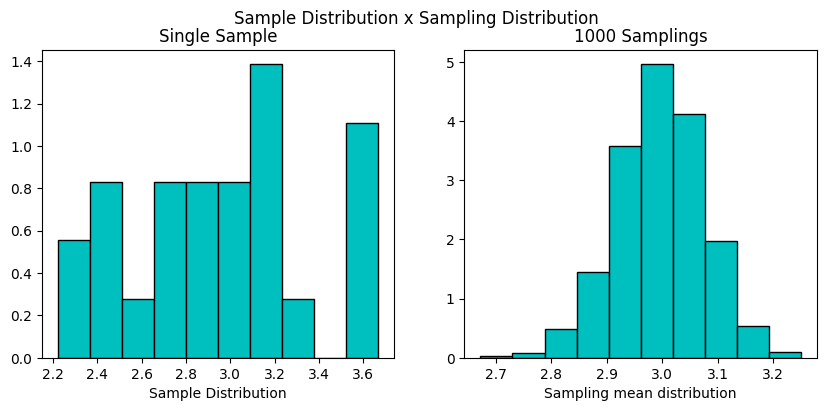

In [66]:
mu = 3.0 
sigma = 0.40
sample_size = 25
simulations = 1000

# Finding a single sample
single_sample = np.random.normal(mu, sigma, size=sample_size)

# Running 1000 simulations and registering their means
sampling_means = [np.mean(np.random.normal(mu, sigma, size=sample_size)) for i in range(simulations)]

# Creating distributions and finding sample mean

fig, ax = plt.subplots(1, 2, figsize =(10, 4))

ax[0].hist(single_sample, 10, density = True, edgecolor='k', color='c') 
ax[0].set_xlabel("Sample Distribution")
ax[0].set_title(label = f"Single Sample")

ax[1].hist(sampling_means, 10, density = True, edgecolor='k', color='c')
ax[1].set_xlabel("Sampling mean distribution")
ax[1].set_title(label = f"{simulations} Samplings")


fig.suptitle("Sample Distribution x Sampling Distribution")

plt.show()

## Problem 3.26.

When sample data were used to rank states by brain cancer rates, Ellenberg (2014) noted
that the highest ranking state (South Dakota) and the nearly lowest ranking state (North
Dakota) had relatively small sample sizes. Also, when schools in North Carolina were ranked
by their average improvement in test scores, the best and the worst schools were very small
schools. Explain how these results could merely reflect how the variability of sample means and
proportions depends on the sample size.

`Your answer here`